# Trainable Embedding + MLP Classifier

This notebook fine-tunes the embedding representations by training
a simple neural network end-to-end. The embedding layer is initialized
randomly but updated through gradient descent, allowing the model to
capture semantic relationships such as *"not bad"* being positive.

## 1. Import Libraries and Load Data

In [8]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Load preprocessed token sequences (IDs)
# Ensure these come from your Tokenizer notebook
train_df = pd.read_csv("dataset/train_embeddings.csv")
test_df  = pd.read_csv("dataset/test_embeddings.csv")

X_train = train_df.drop(columns=['label']).values
y_train = train_df['label'].values
X_test  = test_df.drop(columns=['label']).values
y_test  = test_df['label'].values

vocab_size = int(max(X_train.max(), X_test.max())) + 1  # estimate vocab size
print("Data loaded:", X_train.shape, X_test.shape)
print("Estimated vocab size:", vocab_size)

Data loaded: (1600, 200) (400, 200)
Estimated vocab size: 19777


## 2. Define a Trainable Embedding + MLP Model

In [23]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Embedding(
        input_dim=vocab_size,
        output_dim=100,
        mask_zero=True
    ),

    layers.Conv1D(
        filters=128,
        kernel_size=3,
        activation='relu',
        padding='same'
    ),

    layers.GlobalMaxPooling1D(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),

    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 3. Train the Model

In [24]:
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=64,
    verbose=1
)

Epoch 1/10


/Users/luna/PycharmProjects/Tokenizer/.venv/lib/python3.11/site-packages/keras/src/layers/layer.py:970: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4965 - loss: 0.6938 - val_accuracy: 0.5188 - val_loss: 0.6899
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6861 - loss: 0.6652 - val_accuracy: 0.6625 - val_loss: 0.6837
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9382 - loss: 0.5831 - val_accuracy: 0.7125 - val_loss: 0.6531
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9972 - loss: 0.3683 - val_accuracy: 0.7188 - val_loss: 0.5711
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.1108 - val_accuracy: 0.7625 - val_loss: 0.5062
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0235 - val_accuracy: 0.7500 - val_loss: 0.4814
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 0.7625 - val_loss: 0.4731
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.7563 - val_loss: 0.

## 4. Evaluate Model Performance

In [25]:
y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy: 0.7575
F1 Score: 0.7640

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       197
           1       0.75      0.77      0.76       203

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



/Users/luna/PycharmProjects/Tokenizer/.venv/lib/python3.11/site-packages/keras/src/layers/layer.py:970: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


## 5. Visualize Training Progress

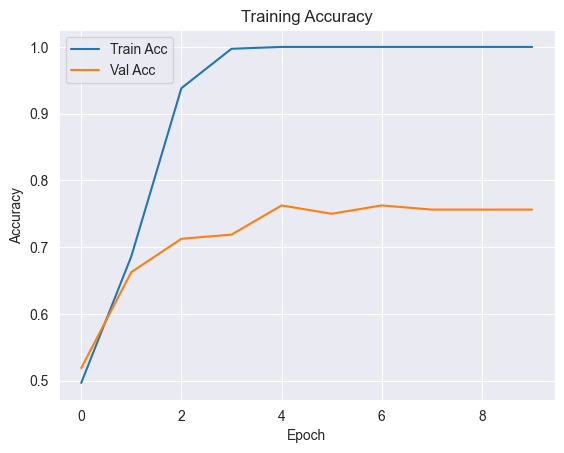

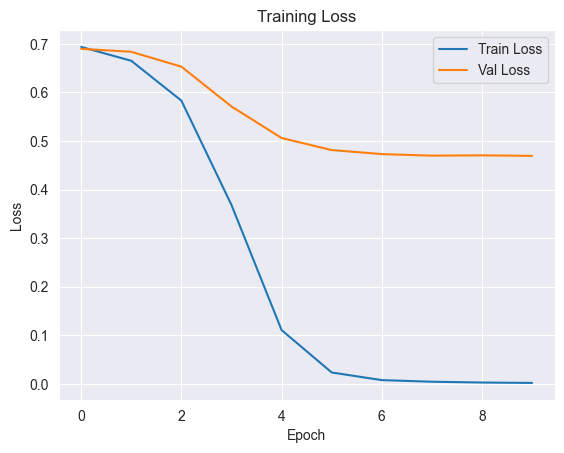

In [26]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 6. Manual Test Cases

In [27]:
import numpy as np, json
from pathlib import Path

# Load the saved tokenizer vocabulary
TOKENIZER_JSON = Path("artifacts/tokenizer_word/tokenizer.json")

if TOKENIZER_JSON.exists():
    meta = json.loads(TOKENIZER_JSON.read_text())
    id2word = meta.get("id2word", [])
    word2id = {w: i for i, w in enumerate(id2word)}
    print(f"Loaded tokenizer vocabulary with {len(word2id)} tokens.")
else:
    raise FileNotFoundError("tokenizer.json not found. Please export it from your tokenizer notebook first.")

# Create a simple tokenizer-like object
class myTokenizer:
    def __init__(self, word2id):
        self.word2id = word2id

tokenizer = myTokenizer(word2id)

Loaded tokenizer vocabulary with 19779 tokens.


In [28]:
# Define sentence prediction helper
def predict_sentence(sentence, tokenizer, model, max_len=200):
    """
    Convert raw text → token IDs → padded sequence → model prediction.
    """
    # Basic tokenization (simple space split, lowercased)
    tokens = sentence.lower().split()
    ids = [tokenizer.word2id.get(w, 1) for w in tokens]  # 1 = <UNK>

    # Pad or truncate
    if len(ids) < max_len:
        ids += [0] * (max_len - len(ids))
    else:
        ids = ids[:max_len]

    # Predict
    arr = np.array(ids).reshape(1, -1)
    prob = model.predict(arr, verbose=0)[0][0]
    label = "positive" if prob >= 0.5 else "negative"
    return label, prob

In [29]:
# Run a batch of test sentences
test_sentences = [
    "i really love this film",
    "it's okay, not great",
    "absolutely fantastic performance",
    "not good at all",
    "i don't like this movie",
    "the music and visuals were wonderful"
]

print("\nTesting model on custom examples:\n")
for s in test_sentences:
    label, prob = predict_sentence(s, tokenizer, model)
    print(f"{s:<45} → {label.upper()} ({prob:.2f})")


Testing model on custom examples:

i really love this film                       → NEGATIVE (0.31)
it's okay, not great                          → NEGATIVE (0.47)
absolutely fantastic performance              → NEGATIVE (0.47)
not good at all                               → NEGATIVE (0.18)
i don't like this movie                       → NEGATIVE (0.07)
the music and visuals were wonderful          → NEGATIVE (0.42)
